In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import random
from scipy.spatial.distance import pdist, squareform



In [4]:
x_vals = random.sample(range(1, 5), 3)
y_vals = random.sample(range(1, 5), 3)
z_vals = [0]*3

coordinates = list(zip(x_vals,y_vals,z_vals))

In [12]:
coordinates

[(4, 3, 0), (1, 2, 0), (2, 1, 0)]

In [124]:
A = np.array(coordinates)

In [83]:
B = squareform(pdist(A))
print(B)
# B = list(B)
# print(B)

[[0.         3.16227766 2.82842712]
 [3.16227766 0.         1.41421356]
 [2.82842712 1.41421356 0.        ]]


<class 'networkx.classes.graph.Graph'>


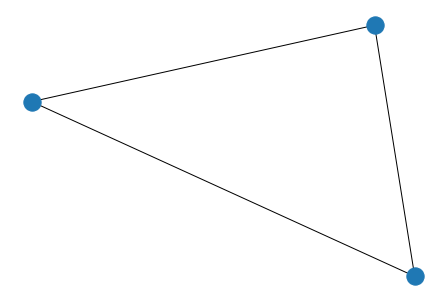

In [118]:
G = nx.from_numpy_matrix(B)
nx.draw(G)
print(type(G))

In [121]:
for i in range(3):
    for j in range(3):
        if (i!=j):
            if G.get_edge_data(i,j) !=None:
                if (G.get_edge_data(i,j)['weight']<2):
                    print("i=",i, "j=",j)
                    G.remove_edge(i,j)

i= 1 j= 2


In [122]:
for i in range(3):
    for j in range(3):
        print( "i=",i,"j=",j,G.get_edge_data(i,j))
# print( G.get_edge_data(2,1))           

i= 0 j= 0 None
i= 0 j= 1 {'weight': 3.1622776601683795}
i= 0 j= 2 {'weight': 2.8284271247461903}
i= 1 j= 0 {'weight': 3.1622776601683795}
i= 1 j= 1 None
i= 1 j= 2 None
i= 2 j= 0 {'weight': 2.8284271247461903}
i= 2 j= 1 None
i= 2 j= 2 None


In [92]:
print( G.get_edge_data(2,1))           

{'weight': 1.4142135623730951}
